In [1]:
# !pip install ipywidgets widgetsnbextension pandas-profiling

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
# import seaborn as sns
# import random
import torch
import numpy as np
from tqdm import tqdm

In [2]:
# GOOGL

# We would like all available data from 01/01/2000 until 12/31/2016.
# start_date = '2000-01-01'  # '2014-01-01'  # 2012-10-21
# end_date = '2022-11-22'  # '2014-10-20'  # 2022

# # User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = data.DataReader('IBM', 'yahoo', start_date, end_date)
start_date = '1993-01-30'  # '2014-01-01'  # 2012-10-21
end_date = '2022-12-01'  # '2014-10-20'  # 2022

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = data.DataReader('IBM', 'yahoo', start_date, end_date)
panel_data = data.DataReader('SPY', 'yahoo', start_date, end_date)
# Resample the data to normalize it, the data comes without any data on the (days that the markets are close, weekends)
panel_data = panel_data.resample("D").max()

# Fill the data in the closed markets with the data from the previous trading day, because it is their true value
panel_data = panel_data.fillna(method="ffill")

panel_data[panel_data.index.name] = panel_data.index
panel_data.index.name = None
panel_data = panel_data[['Date', 'High', 'Low', 'Open', 'Close', 'Volume']]  # , 'Adj Close']]

panel_data.reset_index(drop=True, inplace=True)
panel_data_ref = panel_data.copy()

# panel_data.head(20)

In [4]:
panel_data.head(20)

,Date,High,Low,Open,Close,Volume
0,1993-02-01,44.25000,43.96875,43.96875,44.25000,480500.0
1,1993-02-02,44.37500,44.12500,44.21875,44.34375,201300.0
2,1993-02-03,44.84375,44.37500,44.40625,44.81250,529400.0
3,1993-02-04,45.09375,44.46875,44.96875,45.00000,531500.0
4,1993-02-05,45.06250,44.71875,44.96875,44.96875,492100.0
5,1993-02-06,45.06250,44.71875,44.96875,44.96875,492100.0
6,1993-02-07,45.06250,44.71875,44.96875,44.96875,492100.0
7,1993-02-08,45.12500,44.90625,44.96875,44.96875,596100.0
8,1993-02-09,44.81250,44.56250,44.81250,44.65625,122100.0
9,1993-02-10,44.75000,44.53125,44.65625,44.71875,379600.0


In [5]:
date = pd.to_datetime(panel_data.pop('Date'), format='%Y-%m-%d')

In [6]:
panel_data_ref

,Date,High,Low,Open,Close,Volume
0,1993-02-01,44.250000,43.968750,43.968750,44.250000,480500.0
1,1993-02-02,44.375000,44.125000,44.218750,44.343750,201300.0
2,1993-02-03,44.843750,44.375000,44.406250,44.812500,529400.0
3,1993-02-04,45.093750,44.468750,44.968750,45.000000,531500.0
4,1993-02-05,45.062500,44.718750,44.968750,44.968750,492100.0
...,...,...,...,...,...,...
10891,2022-11-27,402.910004,401.540009,401.829987,402.329987,30545400.0
10892,2022-11-28,400.809998,395.109985,399.089996,395.910004,67881600.0
10893,2022-11-29,397.299988,393.299988,396.049988,395.230011,52310000.0
10894,2022-11-30,407.679993,393.480011,395.489990,407.679993,144566700.0


In [7]:
plot_cols = ['High', 'Low', 'Open', 'Close', 'Volume']  # , 'Adj Close']
# plot_cols = ['High', 'Low', 'Open', 'Close', 'Adj Close']
plot_features = panel_data[plot_cols]
plot_features.index = date
# _ = plot_features.plot(subplots=True)


In [8]:
# panel_data.describe().transpose()

In [9]:
# panel_data.drop(columns=['Volume'], axis=1, inplace=True)
# panel_data

In [10]:
# Calculate percentage change

panel_data['Open'] = panel_data['Open'].pct_change()
panel_data['High'] = panel_data['High'].pct_change()
panel_data['Low'] = panel_data['Low'].pct_change()
panel_data['Close'] = panel_data['Close'].pct_change()
# panel_data['Adj Close'] = panel_data['Adj Close'].pct_change()

panel_data['Volume'] = panel_data['Volume'].pct_change()
panel_data.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values
# panel_data

In [11]:
# Normalize price columns
min_return = min(panel_data[['Open', 'High', 'Low', 'Close']].min(axis=0)) # , 'Adj Close'
max_return = max(panel_data[['Open', 'High', 'Low', 'Close']].max(axis=0)) # , 'Adj Close'

# Min-max normalize price columns (0-1 range)
panel_data['Open'] = (panel_data['Open'] - min_return) / (max_return - min_return)
panel_data['High'] = (panel_data['High'] - min_return) / (max_return - min_return)
panel_data['Low'] = (panel_data['Low'] - min_return) / (max_return - min_return)
panel_data['Close'] = (panel_data['Close'] - min_return) / (max_return - min_return)
# panel_data['Adj Close'] = (panel_data['Adj Close'] - min_return) / (max_return - min_return)


# Normalize volume column
min_volume = panel_data['Volume'].min(axis=0)
max_volume = panel_data['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
panel_data['Volume'] = (panel_data['Volume'] - min_volume) / (max_volume - min_volume)


In [12]:
# Create training, validation and test split
times = sorted(panel_data.index.values)
last_10pct = sorted(panel_data.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(panel_data.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = panel_data[(panel_data.index < last_20pct)]  # Training data are 80% of total data
df_val = panel_data[(panel_data.index >= last_20pct) & (panel_data.index < last_10pct)]
df_test = panel_data[(panel_data.index >= last_10pct)]

In [13]:
# # Remove date column
# df_train.drop(columns=['Date'], inplace=True)
# df_val.drop(columns=['Date'], inplace=True)
# df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print(f'Training data shape: {train_data.shape}')
print(f'Validation data shape: {val_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (6688, 5)
Validation data shape: (836, 5)
Test data shape: (835, 5)


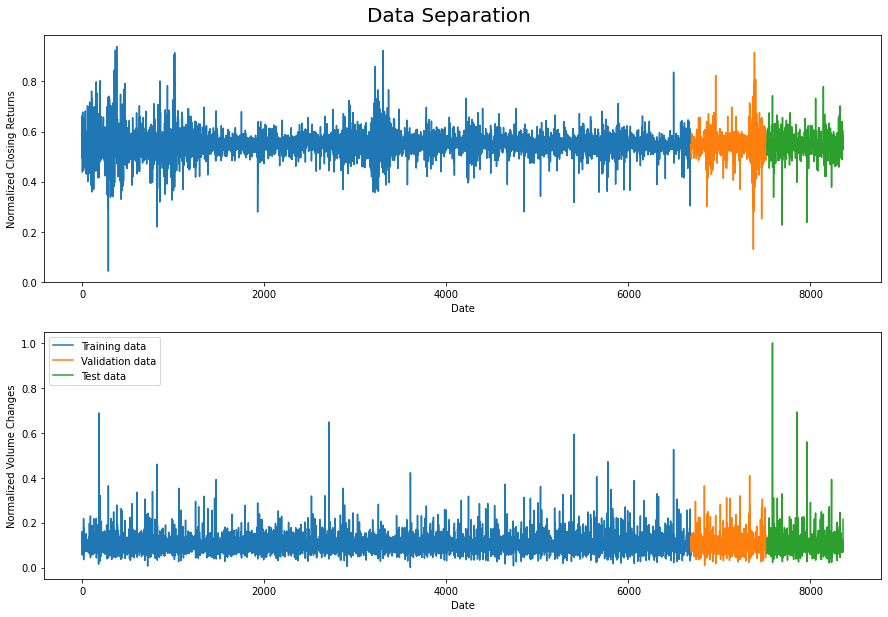

In [14]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')

In [3]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import random, math

### Set device

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Hyperparameters

In [5]:
sequence_length = 128  # [sequence_length] sequences of [input_size] features
input_size = 5
num_layers = 2
hidden_size = 256
num_features = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 10

input_width = 5
target_width = 3

### Create Bidirectional LSTM

In [6]:
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_features):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # batch_first=True -> first layer that takes in the DataSet
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_features)
    
    def forward(self, x):
        # h0 = hidden state
        # c0 = cell state
        # self.num_layers * 2 -> tensor expanded x2 for concatenated state values of "going from begining to end and end to begining"
        # x.size(0) = number of examples sent in -> batch size
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        out, (hiddenState, cellState) = self.lstm(x, (h0, c0))  # (hiddenState, cellState) are not used -> can be replaced as _
        # out[:, -1, :] -> select the last hidden state to send to the linear layer
        # [:, -1, :] -> [all training examples, last hidden state, all the features]
        # out = out.reshape(out.shape[0], -1)
        out = self.fc(out[:, -1, :])

        return out
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.num_layers * 2, batch_size, self.hidden_size).zero_().to(device),
                      weight.new(self.num_layers * 2, batch_size, self.hidden_size).zero_().to(device))
        return hidden



### Load Data

#### DataSet

In [19]:
# from torch.utils.data import Dataset

In [7]:
class DataSetter(Dataset):
    def __init__(self, data: np.ndarray, seq_len: int) -> None:
        """Init function of dataset class
       Args:
            data (np.ndarray): data from the dataframe to numpy
            seq_len (int): len of values to base for the prediction
        """
        self.inputs, self.targets = [], []
        
        for i in range(seq_len, len(data)):
            # Chunks of  data with a length of 128 df-rows
            self.inputs.append(data[i-seq_len:i])
            
            # Value of 4th column (Close Price) of df-row 128+1
            self.targets.append(data[:, 3][i])

        self.inputs, self.targets =\
            torch.FloatTensor(np.array(self.inputs)), torch.FloatTensor(np.array(self.targets))

    def __getitem__(self, idx: int) -> dict:
        """Get item at a certain index
        Args:
            idx (int): index to get the value
        Returns:
            dict: returns the input and the target
        """
        return {'inputs': self.inputs[idx],
                'targets': self.targets[idx]}
    
    def __len__(self) -> int:
        """Length function
        Returns:
            int: length of the Dataset
        """
        return min(len(self.inputs), len(self.targets))

In [21]:
train_dataset = DataSetter(data=train_data, seq_len=sequence_length)
val_dataset = DataSetter(data=val_data, seq_len=sequence_length)
test_dataset = DataSetter(data=test_data, seq_len=sequence_length)

#### DataLoader

In [22]:
# from torch.utils.data import DataLoader

In [23]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Intitialize network

In [24]:
model = BiLSTM(input_size, hidden_size, num_layers, num_features).to(device)

In [25]:
print(model)

BiLSTM(
  (lstm): LSTM(5, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)


### Loss and optimizer

In [26]:
# import torch.optim as optim

In [8]:
criterion = nn.MSELoss()  # nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

NameError: name 'model' is not defined

### Train Network

In [28]:
num_epochs = 10

In [29]:
# import math
# n_iterations = math.ceil(len(train_dataset)/4)

counter = 0
print_every = 1
valid_loss_min = np.Inf


# loss_train = []
model.train()
for epoch in range(num_epochs):
    train_losses = []
    for batch_idx, (data_combo) in enumerate(train_loader):
        # counter += 1


        # Identify Data
        data_in = data_combo['inputs']
        targets = data_combo['targets']
        
        
        # Forward Backward
        # if (batch_idx+1) % 5 == 0:
        #     print(f'epoch {epoch + 1}/{num_epochs}, step {batch_idx + 1}/{100}, inputs {data_in.shape}')
        
        # Get data to CUDA device
        data_in = data_in.to(device=device)#.squeeze(1)
        targets = targets.to(device=device).unsqueeze(1)
        # print(data_in.size(), data_in)

        # # Get to correct shape
        # data_in = data_in.reshape(data_in.shape[0], -1)

        # forward
        scores = model(data_in)
        # print(scores, targets)
        # print(scores.size(), targets.size())
        loss = criterion(scores, targets)
        train_losses.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or Adam step
        optimizer.step()

        # loss_train.append(loss.item())

    # model.eval()

    # targ_pred = model(data_in)
    # val_loss = criterion

        if counter%print_every == 0:
            val_h = model.init_hidden(batch_size)
            val_losses = []
            
            model.eval()
            for data_combo_2 in val_loader:
                inp, lab = data_combo_2['inputs'], data_combo_2['targets']
                inp, lab = inp.to(device), lab.to(device)
                # print(lab)
                out = model(inp)
                # val_h = tuple([each.data for each in val_h])
                # val_h = model(val_h)
                # out, val_h = model(inp, val_h)

                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()

            if np.mean(val_losses) <= valid_loss_min:
                print(f"Epoch: {epoch + 1}/{num_epochs}...",
                    f"Step: {batch_idx + 1}/{100}...",
                    f"Loss: {loss.item():.6f}...",
                    f"Val Loss: {np.mean(val_losses):.6f}")
                torch.save(model.state_dict(), 'LSTM_Models//state_dict.pt')  # save model state (wights, etc.)
                torch.save(model, 'LSTM_Models//model_complete.pt')  # save complete model
                print(f'Validation loss decreased ({valid_loss_min:.6f} --> {np.mean(val_losses):.6f}).  Saving model ...')
                valid_loss_min = np.mean(val_losses)

Epoch: 1/3... Step: 1/100... Loss: 0.280057... Val Loss: 0.177397
Validation loss decreased (inf --> 0.177397).  Saving model ...
Epoch: 1/3... Step: 2/100... Loss: 0.186086... Val Loss: 0.090776
Validation loss decreased (0.177397 --> 0.090776).  Saving model ...
Epoch: 1/3... Step: 3/100... Loss: 0.095029... Val Loss: 0.018561
Validation loss decreased (0.090776 --> 0.018561).  Saving model ...
Epoch: 1/3... Step: 6/100... Loss: 0.031673... Val Loss: 0.007804
Validation loss decreased (0.018561 --> 0.007804).  Saving model ...
Epoch: 1/3... Step: 7/100... Loss: 0.006876... Val Loss: 0.003187
Validation loss decreased (0.007804 --> 0.003187).  Saving model ...
Epoch: 1/3... Step: 15/100... Loss: 0.003833... Val Loss: 0.002980
Validation loss decreased (0.003187 --> 0.002980).  Saving model ...
Epoch: 2/3... Step: 16/100... Loss: 0.002316... Val Loss: 0.002979
Validation loss decreased (0.002980 --> 0.002979).  Saving model ...
Epoch: 2/3... Step: 23/100... Loss: 0.000502... Val Loss: 

### Check accuracy on training & test to see how good our model is

In [30]:
# loading the model parameters (weights, etc.)
# model = torch.load('model//model_complete.pt')
model.load_state_dict(torch.load('LSTM_Models//state_dict.pt'))

<All keys matched successfully>

In [31]:
test_losses = []
test_preds = []
num_correct = 0
h = model.init_hidden(batch_size)

model.eval()
for (combo_data_3) in test_loader:
    inputs, labels = combo_data_3['inputs'], combo_data_3['targets']
    # h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    # output, h = model(inputs, h)
    output = model(inputs)
    test_preds.append(output.cpu().detach().numpy())
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(output.squeeze()) #rounds the output to 0/1
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
        
print("Test loss: {:.3f}".format(np.mean(test_losses)))
# print(output)

Test loss: 0.002


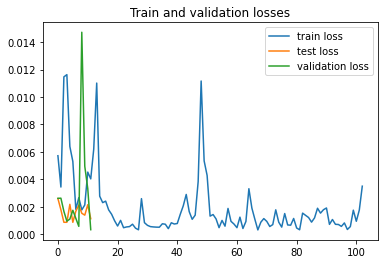

In [32]:
plt.title('Train and validation losses')

plt.plot(range(len(train_losses)), train_losses, label='train loss')
plt.plot(range(len(test_losses)), test_losses, label='test loss')
plt.plot(range(len(val_losses)), val_losses, label='validation loss')
plt.legend()
plt.show()

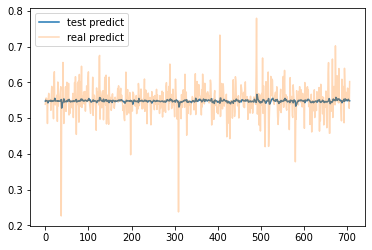

In [33]:
plt.plot(np.concatenate(test_preds, axis=0), label='test predict')
plt.plot(test_loader.dataset[:]['targets'], label= 'real predict', alpha =0.3)
plt.legend()
plt.show()

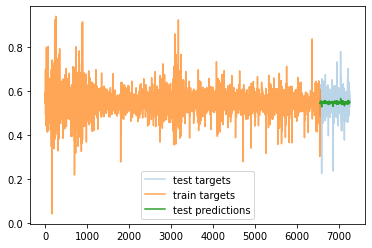

In [34]:
test_predicts = np.concatenate(test_preds, axis=0)
train_targets = train_loader.dataset[:]['targets']
test_targets = test_loader.dataset[:]['targets']

plt.plot(range(len(train_targets), len(train_targets) + len(test_targets)), test_targets, label='test targets', alpha= 0.3)

plt.plot(range(0, len(train_targets)), train_targets, label='train targets', alpha=0.7) 
plt.plot(range(len(train_targets), len(train_targets) + len(test_predicts)), test_predicts, label='test predictions')

plt.legend()


# Moving Average Analysis

In [35]:
panel_data_ref

,Date,High,Low,Open,Close,Volume
0,2000-01-03,110.898659,106.955070,107.492828,110.898659,10823694.0
1,2000-01-04,109.464630,105.999046,108.986618,107.134323,8606279.0
2,2000-01-05,114.483749,107.194077,107.970840,110.898659,13318927.0
3,2000-01-06,113.706978,108.508606,112.810707,108.986618,8338607.0
4,2000-01-07,112.750954,105.760040,112.093689,108.508606,12402108.0
...,...,...,...,...,...,...
8355,2022-11-18,148.309998,145.940002,146.559998,147.639999,4661700.0
8356,2022-11-19,148.309998,145.940002,146.559998,147.639999,4661700.0
8357,2022-11-20,148.309998,145.940002,146.559998,147.639999,4661700.0
8358,2022-11-21,147.929993,146.449997,147.550003,146.679993,3476200.0


In [9]:
# Apply moving average with a window of 10 days to all columns
panel_data_ma = panel_data_ref
panel_data_ma[['Open', 'High', 'Low', 'Close', 'Volume']] =\
    panel_data_ma[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean() 

# Drop all rows with NaN values
panel_data_ma.dropna(how='any', axis=0, inplace=True) 

panel_data_ma.head()

,Date,High,Low,Open,Close,Volume
9,1993-02-10,44.843750,44.509375,44.690625,44.765625,431680.0
10,1993-02-11,44.931250,44.590625,44.771875,44.834375,385580.0
11,1993-02-12,44.981250,44.637500,44.837500,44.859375,369700.0
12,1993-02-13,44.984375,44.659375,44.884375,44.837500,321010.0
13,1993-02-14,44.962500,44.671875,44.875000,44.796875,272110.0


In [10]:
date_ma = pd.to_datetime(panel_data_ma.pop('Date'), format='%Y-%m-%d')

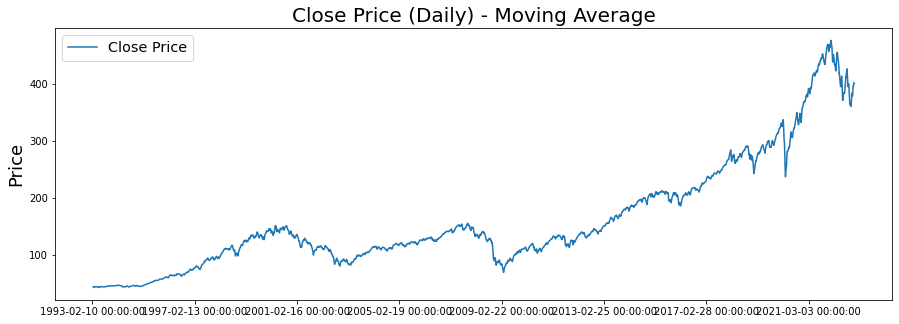

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(panel_data_ma['Close'])
plt.xticks(range(0, panel_data_ma.shape[0], 1464), date_ma.loc[::1464], rotation=0)
plt.ylabel('Price', fontsize=18)
plt.title("Close Price (Daily) - Moving Average", fontsize=20)
plt.legend(['Close Price'], fontsize='x-large', loc='best')
plt.show()


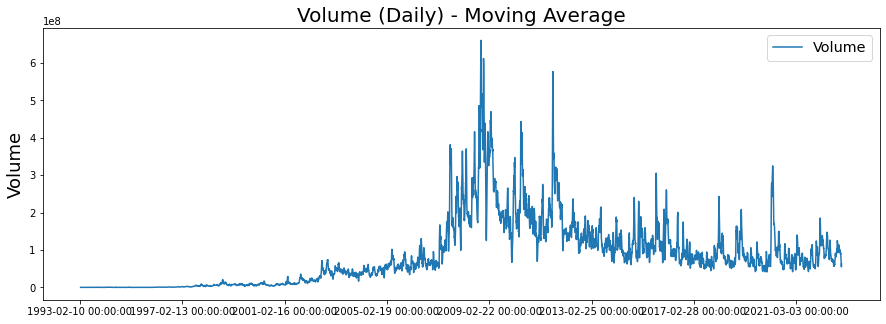

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(panel_data_ma['Volume'])
plt.xticks(range(0, panel_data_ma.shape[0], 1464),\
    date_ma.loc[::1464], rotation=0)
plt.ylabel('Volume', fontsize=18)
plt.title("Volume (Daily) - Moving Average", fontsize=20)
plt.legend(['Volume'], fontsize='x-large', loc='best')
plt.show()

In [15]:
# Calculate percentage change

panel_data_ma['Open'] = panel_data_ma['Open'].pct_change() # Create arithmetic returns column
panel_data_ma['High'] = panel_data_ma['High'].pct_change() # Create arithmetic returns column
panel_data_ma['Low'] = panel_data_ma['Low'].pct_change() # Create arithmetic returns column
panel_data_ma['Close'] = panel_data_ma['Close'].pct_change() # Create arithmetic returns column

panel_data_ma['Volume'] = panel_data_ma['Volume'].pct_change()

panel_data_ma.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################

In [17]:
# Normalize price columns

min_return_ma = min(panel_data_ma[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return_ma = max(panel_data_ma[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
panel_data_ma['Open'] = (panel_data_ma['Open'] - min_return_ma) / (max_return_ma - min_return_ma)
panel_data_ma['High'] = (panel_data_ma['High'] - min_return_ma) / (max_return_ma - min_return_ma)
panel_data_ma['Low'] = (panel_data_ma['Low'] - min_return_ma) / (max_return_ma - min_return_ma)
panel_data_ma['Close'] = (panel_data_ma['Close'] - min_return_ma) / (max_return_ma- min_return_ma)

###############################################################################
# Normalize volume column

min_volume_ma = panel_data_ma['Volume'].min(axis=0)
max_volume_ma = panel_data_ma['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
panel_data_ma['Volume'] = (panel_data_ma['Volume'] - min_volume_ma) / (max_volume_ma - min_volume_ma)

###############################################################################


In [18]:
panel_data_ma

,High,Low,Open,Close,Volume
10,0.670165,0.667497,0.667339,0.661349,0.272581
11,0.652374,0.651067,0.659864,0.640592,0.304990
12,0.630234,0.639159,0.650944,0.618412,0.260276
13,0.618440,0.634699,0.624327,0.609533,0.250085
14,0.619910,0.622822,0.624326,0.610996,0.243715
...,...,...,...,...,...
10891,0.671031,0.689868,0.689417,0.671825,0.292566
10892,0.644659,0.639823,0.635941,0.628122,0.305338
10893,0.626058,0.630148,0.619772,0.624509,0.291535
10894,0.681037,0.631110,0.616789,0.690665,0.371472


In [21]:
# Create training, validation and test split

dates_ma = sorted(panel_data_ma.index.values)
last_10pct_ma = sorted(panel_data_ma.index.values)[-int(0.1*len(dates_ma))] # Last 10% of series
last_20pct_ma = sorted(panel_data_ma.index.values)[-int(0.2*len(dates_ma))] # Last 20% of series

df_train_ma = panel_data_ma[(panel_data_ma.index < last_20pct_ma)]  # Training data are 80% of total data
df_val_ma = panel_data_ma[(panel_data_ma.index >= last_20pct_ma) & (panel_data_ma.index < last_10pct_ma)]
df_test_ma = panel_data_ma[(panel_data_ma.index >= last_10pct_ma)]

In [25]:
# Remove date column
# df_train_ma.drop(columns=['Date'], inplace=True)
# df_val_ma.drop(columns=['Date'], inplace=True)
# df_test_ma.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data_ma = df_train_ma.values
val_data_ma = df_val_ma.values
test_data_ma = df_test_ma.values
print(f'Training data shape: {train_data_ma.shape}')
print(f'Validation data shape: {val_data_ma.shape}')
print(f'Test data shape: {test_data_ma.shape}')

# df_train_ma.head()

Training data shape: (8709, 5)
Validation data shape: (1089, 5)
Test data shape: (1088, 5)


In [28]:
test_data_ma

array([[0.62483971, 0.62026707, 0.62171479, 0.62347432, 0.34138126],
       [0.62585304, 0.62454559, 0.62313538, 0.62950511, 0.34163069],
       [0.65127086, 0.64915346, 0.62767498, 0.6659668 , 0.34465719],
       ...,
       [0.62605848, 0.63014834, 0.61977231, 0.62450938, 0.29153506],
       [0.68103734, 0.6311099 , 0.61678926, 0.69066485, 0.37147185],
       [0.7036813 , 0.69333522, 0.70397473, 0.69652493, 0.3458876 ]])

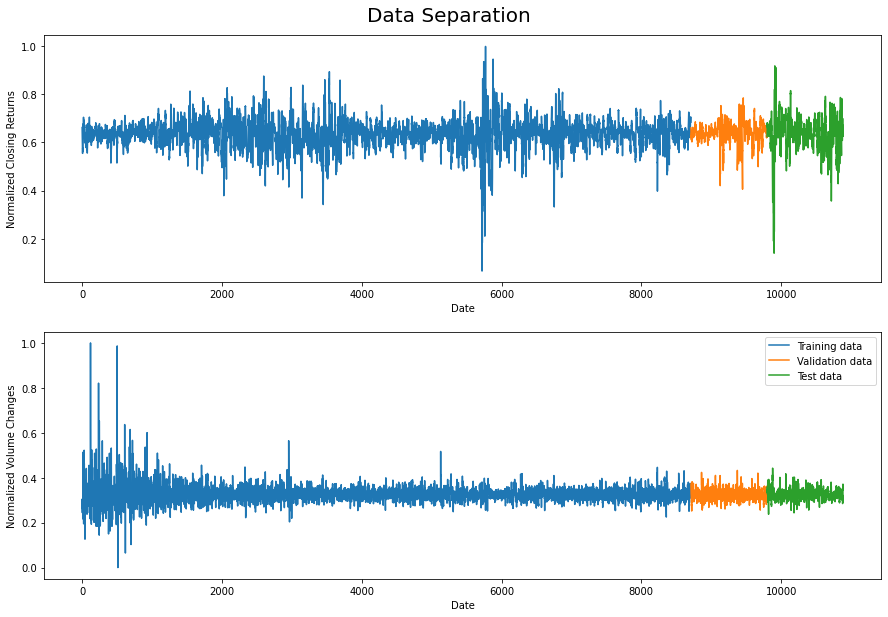

In [29]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data_ma.shape[0]), df_train_ma['Close'], label='Training data')

ax1.plot(np.arange(train_data_ma.shape[0], 
                   train_data_ma.shape[0] + val_data_ma.shape[0]), df_val_ma['Close'], label='Validation data')

ax1.plot(np.arange(train_data_ma.shape[0] + val_data_ma.shape[0], 
                   train_data_ma.shape[0] + val_data_ma.shape[0] + test_data_ma.shape[0]), df_test_ma['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data_ma.shape[0]), df_train_ma['Volume'], label='Training data')

ax2.plot(np.arange(train_data_ma.shape[0], 
                   train_data_ma.shape[0]+val_data_ma.shape[0]), df_val_ma['Volume'], label='Validation data')

ax2.plot(np.arange(train_data_ma.shape[0]+val_data_ma.shape[0], 
                   train_data_ma.shape[0]+val_data_ma.shape[0]+test_data_ma.shape[0]), df_test_ma['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')


In [ ]:
# # Moving Average - Create chunks of training, validation and test data
# # sequence_length
# # Training data
# X_train, y_train = [], []
# for i in range(sequence_length, len(train_data)):
#   X_train.append(train_data[i-sequence_length:i]) # Chunks of training data with a length of 128 df-rows
#   y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
# X_train, y_train = np.array(X_train), np.array(y_train)

# ###############################################################################

# # Validation data
# X_val, y_val = [], []
# for i in range(sequence_length, len(val_data)):
#     X_val.append(val_data[i-sequence_length:i])
#     y_val.append(val_data[:, 3][i])
# X_val, y_val = np.array(X_val), np.array(y_val)

# ###############################################################################

# # Test data
# X_test, y_test = [], []
# for i in range(sequence_length, len(test_data)):
#     X_test.append(test_data[i-sequence_length:i])
#     y_test.append(test_data[:, 3][i])    
# X_test, y_test = np.array(X_test), np.array(y_test)

# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)

In [30]:
(train_data_ma[0])

array([0.67016529, 0.66749658, 0.66733947, 0.6613494 , 0.27258088])

In [31]:
train_dataset_ma = DataSetter(data=train_data_ma, seq_len=sequence_length)
val_dataset_ma = DataSetter(data=val_data_ma, seq_len=sequence_length)
test_dataset_ma = DataSetter(data=test_data_ma, seq_len=sequence_length)

In [47]:
train_data_ma.shape

(6679, 5)

In [39]:
batch_size = 64
train_loader_ma = DataLoader(dataset=train_dataset_ma, batch_size=batch_size, shuffle=False)
val_loader_ma = DataLoader(dataset=val_dataset_ma, batch_size=batch_size, shuffle=False)
test_loader_ma = DataLoader(dataset=test_dataset_ma, batch_size=batch_size, shuffle=False)

In [47]:
model_ma = BiLSTM(input_size, hidden_size, num_layers, num_features).to(device)

In [50]:
criterion = nn.MSELoss()  # nn.CrossEntropyLoss()
optimizer_ma = optim.Adam(model_ma.parameters(), lr=learning_rate)

In [57]:
train_losses_ma

[0.0005560331046581268,
 0.0005129138007760048,
 0.0002815642219502479,
 0.0003651294391602278,
 0.0005693514831364155,
 0.0008538418915122747,
 0.0008287611417472363,
 0.0007362032774835825,
 0.00039872026536613703,
 0.00018077476124744862,
 0.00030545046320185065,
 0.0006036770064383745,
 0.00029669387731701136,
 0.0002615572593640536,
 0.0006500643212348223,
 0.0007480556378141046,
 0.0007908308762125671,
 0.0011251757387071848,
 0.0005765777896158397,
 0.0006036917911842465,
 0.0007662871503271163,
 0.0019108224660158157,
 0.001135901897214353,
 0.0016285860911011696,
 0.0014060542453080416,
 0.0018131149699911475,
 0.0014192622620612383,
 0.0005284600192680955,
 0.0008877671207301319,
 0.004014542326331139,
 0.0028120155911892653,
 0.001089937868528068,
 0.0011600609868764877,
 0.0012602764181792736,
 0.0013574812328442931,
 0.001379799097776413,
 0.001795592368580401,
 0.00251822080463171,
 0.003680659458041191,
 0.002552071586251259,
 0.001029494684189558,
 0.0014188747154548764

In [62]:
len(train_loader_ma)

135

In [56]:
# import math
# n_iterations = math.ceil(len(train_dataset)/4)

counter = 0
print_every = 1
valid_loss_min_ma = np.Inf

num_epochs = 2
# loss_train = []
model_ma.train()
for epoch in range(num_epochs):
    train_losses_ma = []
    for batch_idx, (data_combo_ma) in enumerate(train_loader_ma):
        # counter += 1


        # Identify Data
        data_in_ma = data_combo_ma['inputs']
        targets_ma = data_combo_ma['targets']
        
        
        # Forward Backward
        # if (batch_idx+1) % 5 == 0:
        #     print(f'epoch {epoch + 1}/{num_epochs}, step {batch_idx + 1}/{100}, inputs {data_in.shape}')
        
        # Get data to CUDA device
        data_in_ma = data_in_ma.to(device=device)#.squeeze(1)  #
        targets_ma = targets_ma.to(device=device).unsqueeze(1)
        # print(data_in.size(), data_in)

        # # Get to correct shape
        # data_in = data_in.reshape(data_in.shape[0], -1)

        # forward
        scores_ma = model_ma(data_in_ma)
        # print(scores, targets)
        # print(scores.size(), targets.size())
        loss_ma = criterion(scores_ma, targets_ma)
        train_losses_ma.append(loss_ma.item())

        # backward
        optimizer_ma.zero_grad()
        loss_ma.backward()

        # gradient descent or Adam step
        optimizer_ma.step()

        # loss_train.append(loss.item())

    # model.eval()

    # targ_pred = model(data_in)
    # val_loss = criterion

        if counter%print_every == 0:
            val_h_ma = model_ma.init_hidden(batch_size)
            val_losses_ma = []
            
            model_ma.eval()
            for data_combo_2_ma in val_loader_ma:
                inp_ma, lab_ma = data_combo_2_ma['inputs'], data_combo_2_ma['targets']
                inp_ma, lab_ma = inp_ma.to(device), lab_ma.to(device)
                # print(lab)
                out_ma = model_ma(inp_ma)
                # val_h = tuple([each.data for each in val_h])
                # val_h = model(val_h)
                # out, val_h = model(inp, val_h)

                val_loss_ma = criterion(out_ma.squeeze(), lab_ma.float())
                val_losses_ma.append(val_loss_ma.item())
                
            model_ma.train()

            if np.mean(val_losses_ma) <= valid_loss_min_ma:
                print(f"Epoch: {epoch + 1}/{num_epochs}...",
                    f"Step: {batch_idx + 1}/{100}...",
                    f"Loss: {loss_ma.item():.6f}...",
                    f"Val Loss: {np.mean(val_losses_ma):.6f}")
                torch.save(model_ma.state_dict(), 'LSTM_Models//state_ma_dict.pt')  # save model state (wights, etc.)
                torch.save(model_ma, 'LSTM_Models//model__ma_complete.pt')  # save complete model
                print(f'Validation loss decreased ({valid_loss_min_ma:.6f} --> {np.mean(val_losses_ma):.6f}).  Saving model ...')
                valid_loss_min_ma = np.mean(val_losses_ma)



Epoch: 1/2... Step: 1/100... Loss: 0.000895... Val Loss: 0.002116
Validation loss decreased (inf --> 0.002116).  Saving model ...
Epoch: 1/2... Step: 2/100... Loss: 0.001037... Val Loss: 0.001898
Validation loss decreased (0.002116 --> 0.001898).  Saving model ...
Epoch: 1/2... Step: 3/100... Loss: 0.000932... Val Loss: 0.001548
Validation loss decreased (0.001898 --> 0.001548).  Saving model ...
Epoch: 1/2... Step: 4/100... Loss: 0.000681... Val Loss: 0.001461
Validation loss decreased (0.001548 --> 0.001461).  Saving model ...
Epoch: 1/2... Step: 10/100... Loss: 0.001096... Val Loss: 0.001439
Validation loss decreased (0.001461 --> 0.001439).  Saving model ...
Epoch: 1/2... Step: 22/100... Loss: 0.002126... Val Loss: 0.001422
Validation loss decreased (0.001439 --> 0.001422).  Saving model ...
Epoch: 1/2... Step: 29/100... Loss: 0.001332... Val Loss: 0.001377
Validation loss decreased (0.001422 --> 0.001377).  Saving model ...
Epoch: 1/2... Step: 33/100... Loss: 0.002195... Val Loss:

In [58]:
# loading the model parameters (weights, etc.)
# model = torch.load('LSTM_Models//model_complete.pt')
model_ma.load_state_dict(torch.load('LSTM_Models//state_ma_dict.pt'))

<All keys matched successfully>

In [59]:

test_losses_ma = []
test_preds_ma = []
num_correct_ma = 0
# h_ma = model_ma.init_hidden(batch_size)

model_ma.eval()
for (combo_data_3_ma) in test_loader_ma:
    inputs_ma, labels_ma = combo_data_3_ma['inputs'], combo_data_3_ma['targets']
    # h_ma = tuple([each.data for each in h_ma])
    inputs_ma, labels_ma = inputs_ma.to(device), labels_ma.to(device)
    # output, h = model(inputs, h)
    output_ma = model_ma(inputs_ma)
    test_preds_ma.append(output_ma.cpu().detach().numpy())
    test_loss_ma = criterion(output_ma.squeeze(), labels_ma.float())
    test_losses_ma.append(test_loss_ma.item())
    pred_ma = torch.round(output_ma.squeeze()) #rounds the output to 0/1
    correct_tensor_ma = pred_ma.eq(labels_ma.float().view_as(pred_ma))
    correct_ma = np.squeeze(correct_tensor_ma.cpu().numpy())
    num_correct_ma += np.sum(correct_ma)
        
print("Test loss: {:.3f}".format(np.mean(test_losses_ma)))

Test loss: 0.001


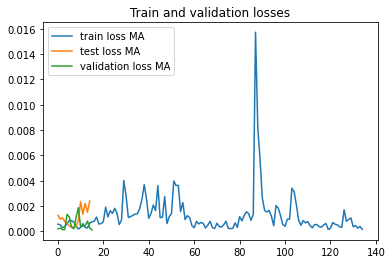

In [60]:
plt.title('Train and validation losses')

plt.plot(range(len(train_losses_ma)), train_losses_ma, label='train loss MA')
plt.plot(range(len(test_losses_ma)), test_losses_ma, label='test loss MA')
plt.plot(range(len(val_losses_ma)), val_losses_ma, label='validation loss MA')
plt.legend()
plt.show()

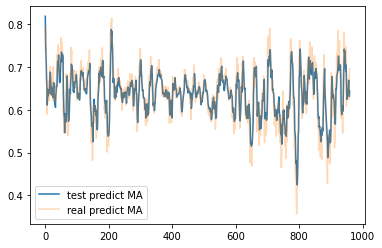

In [61]:
plt.plot(np.concatenate(test_preds_ma, axis=0), label='test predict MA')
plt.plot(test_loader_ma.dataset[:]['targets'], label= 'real predict MA', alpha =0.3)
plt.legend()
plt.show()

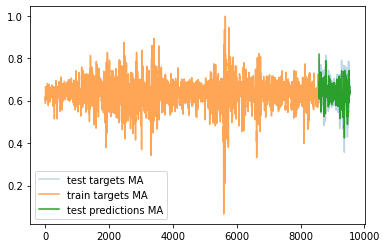

In [63]:
test_predicts_ma = np.concatenate(test_preds_ma, axis=0)
train_targets_ma = train_loader_ma.dataset[:]['targets']
test_targets_ma = test_loader_ma.dataset[:]['targets']

plt.plot(range(len(train_targets_ma), len(train_targets_ma) + len(test_targets_ma)), test_targets_ma, label='test targets MA', alpha= 0.3)

plt.plot(range(0, len(train_targets_ma)), train_targets_ma, label='train targets MA', alpha=0.7) 
plt.plot(range(len(train_targets_ma), len(train_targets_ma) + len(test_predicts_ma)), test_predicts_ma, label='test predictions MA')

plt.legend()


In [ ]:
# # Moving Average - Testing different model architectures


# def create_model():
#   in_seq = Input(shape = (seq_len, 5))
      
#   x = Bidirectional(LSTM(128, return_sequences=True))(in_seq)
#   x = Bidirectional(LSTM(128, return_sequences=True))(x)
#   x = Bidirectional(LSTM(64, return_sequences=True))(x) 
          
#   avg_pool = GlobalAveragePooling1D()(x)
#   max_pool = GlobalMaxPooling1D()(x)
#   conc = concatenate([avg_pool, max_pool])
#   conc = Dense(64, activation="relu")(conc)
#   out = Dense(1, activation="sigmoid")(conc)      

#   model = Model(inputs=in_seq, outputs=out)
#   model.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])    
#   return model

# model = create_model()

# #model.summary()
# #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
# callback = tf.keras.callbacks.ModelCheckpoint('Bi-LSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

# model.fit(X_train, y_train,
#               batch_size=2048,
#               verbose=2,
#               callbacks=[callback],
#               epochs=200,
#               #shuffle=True,
#               validation_data=(X_val, y_val),)    

# model = tf.keras.models.load_model('/content/Bi-LSTM.hdf5')

# ###############################################################################
# '''Calculate predictions and metrics'''

# #Calculate predication for training, validation and test data
# train_pred = model.predict(X_train)
# val_pred = model.predict(X_val)
# test_pred = model.predict(X_test)

# #Print evaluation metrics for all datasets
# train_eval = model.evaluate(X_train, y_train, verbose=0)
# val_eval = model.evaluate(X_val, y_val, verbose=0)
# test_eval = model.evaluate(X_test, y_test, verbose=0)
# print(' ')
# print('Evaluation metrics')
# print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
# print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
# print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

# ###############################################################################
# '''Display results'''

# fig = plt.figure(figsize=(15,15))
# st = fig.suptitle("Moving Average - Bi-LSTM Model", fontsize=22)
# st.set_y(1.02)

# #Plot training data results
# ax11 = fig.add_subplot(311)
# ax11.plot(train_data[:, 3], label='IBM Closing Returns')
# ax11.plot(train_pred, label='Predicted IBM Closing Returns')
# ax11.set_title("Training Data", fontsize=18)
# ax11.set_xlabel('Date')
# ax11.set_ylabel('IBM Closing Returns')

# #Plot validation data results
# ax21 = fig.add_subplot(312)
# ax21.plot(val_data[:, 3], label='IBM Closing Returns')
# ax21.plot(val_pred, label='Predicted IBM Closing Returns')
# ax21.set_title("Validation Data", fontsize=18)
# ax21.set_xlabel('Date')
# ax21.set_ylabel('IBM Closing Returns')

# #Plot test data results
# ax31 = fig.add_subplot(313)
# ax31.plot(test_data[:, 3], label='IBM Closing Returns')
# ax31.plot(test_pred, label='Predicted IBM Closing Returns')
# ax31.set_title("Test Data", fontsize=18)
# ax31.set_xlabel('Date')
# ax31.set_ylabel('IBM Closing Returns')
 
# plt.tight_layout()
# plt.legend(loc='best')